# Принятие решений в бизнесе на основе данных

В качестве аналитика интернет магазина нужно улучшить его работу путем работы с гипотезами и А/В тестами.

# Описание данных
[**Данные для первой части**](#a)

Файл `/datasets/hypothesis.csv`

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

[**Данные для второй части**](#b)

Файл `/datasets/orders.csv`:

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`:

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_colwidth', -1)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Часть 1. Приоритизация гипотез.<a id="a"></a>

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Расчитаем ICE.

In [4]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence']/hypothesis['Efforts'],1)

In [5]:
hypothesis.sort_values(by = 'ICE', ascending = False)[['Hypothesis','ICE']]

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Рассчитаем RICE.

In [6]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [7]:
hypothesis.sort_values(by = 'RICE', ascending = False)[['Hypothesis','RICE']]

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [8]:
hypothesis.loc[7,:]['Hypothesis']

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

### Вывод

При использовании ICE основной гипотезой является 'Запустить акцию, дающую скидку на товар в день рождения'. Однако по RICE эта гипотеза не только не осталась на первом месте, но и откатилась на 5. Это объясняется тем, что в фреймворке RICE в расчете присутствует параметр Reach - вовлеченность. Очевидно, что такое нововведение не даст сильный прирост в краткосрочный период, поэтому результаты во время проведения теста будет обнаружить не так просто. Однако в долгосрочной перспективе эта гипотеза может принести определенный результат, поэтому по ICE она занимает первое место. В то же время гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' вырвалась на первое место по RICE как раз из - за того, что имеет максимальную оценку по параметру Reach(10). Также стоит отметить, что гипотезы 4 гипотезы по ICE и RICE занимают последние места. Можно сделать вывод, что проводить эти гипотезы сразу нет смысла.

## Часть 2. Анализ A/B-теста<a id="b"></a>
Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача**

Проанализируйте A/B-тест:
 - [1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#1)
 - [2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#2)
 - [3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#3)
 - [4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#4)
 - [5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#5)
 - [6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#6)
 - [7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#7)
 - [8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#8)
 - [9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#9)
 - [10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#10)
 - [11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#11)
 - [12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#12)
 - [13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#13)
 - [14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.](#14)

Рассмотрим эти два файла и преобразуем данные.

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders = orders.drop_duplicates()

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 56.1+ KB


In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors = visitors.drop_duplicates()

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


Данные преобразованы в датафрейм, дубликатов не обнаружено, можем идти дальше.

**Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**<a id="1"></a>

Преобразуем формат данных столбцов date.

In [18]:
orders['date'] = pd.to_datetime(orders['date'])

visitors['date'] = pd.to_datetime(visitors['date'])

Создадим массив уникальных пар значений дат и групп.

In [19]:
datesGroups = orders[['date','group']].drop_duplicates()

Агрегируем значения. Вычислим максимальную дату. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.

In [20]:
ordersAggregated = datesGroups.apply(lambda x:\
orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}),\
axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [21]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).\
sort_values(by=['date','group'])

Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия.

In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А.

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B.

In [24]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим график выручки по группам A и B.

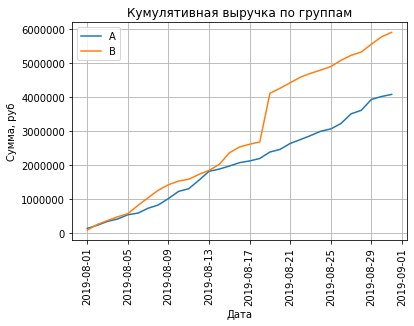

In [25]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel("Дата")
plt.ylabel("Сумма, руб")
plt.grid()
plt.legend()
plt.xticks(rotation=90); 

*Можем увидеть, что выручка более или менее равномерно увеличивается в обеих группах кроме резкого скачка в районе 18 августа в группе В. Быть может какое то событие повлияло на группу В.*

**Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**<a id="2"></a>

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

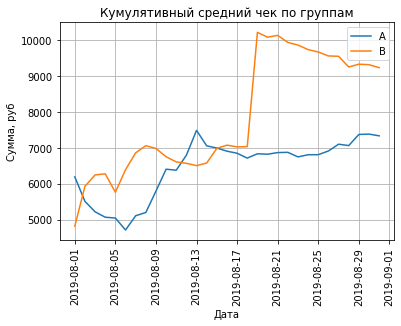

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.xlabel("Дата")
plt.ylabel("Сумма, руб")
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=90);

*По графику среднего чека можем увидеть причину резкого роста на прошлом графике - видимо в группу В пришли клиенты, совершившие дорогие покупки. Если говорить про группу А, то там метрика стабилизируется ближе к концу теста.*

**Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**<a id="3"></a>

Построим график относительного различия для среднего чека.

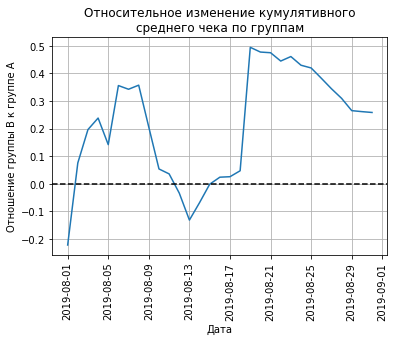

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',\
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.grid()
plt.title('Относительное изменение кумулятивного\nсреднего чека по группам')
plt.xlabel("Дата")
plt.ylabel("Отношение группы B к группе А")
# добавляем ось X
          
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90);

*В некоторых точках графика мы видим очень резкий рост, что может говорить о том, что где - то действительно появились пользователи с очень крупными заказами.*

**Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.**<a id="4"></a>

Аналогично проанализируем график кумулятивной конверсии.

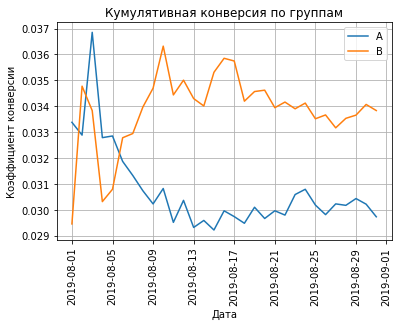

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам')
plt.xlabel("Дата")
plt.ylabel("Коэффициент конверсии")
plt.grid()
plt.legend()
plt.xticks(rotation=90); 

*Можем видеть, что сначала оба графика довольно сильно колебались, однако ближе к концу теста их колебания сильно уменьшились и стало видно, что конверсия в группе B оказалась больше, чем в группе А.*

**Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.**<a id="5"></a>

Построим график относительного различия кумулятивных конверсий.

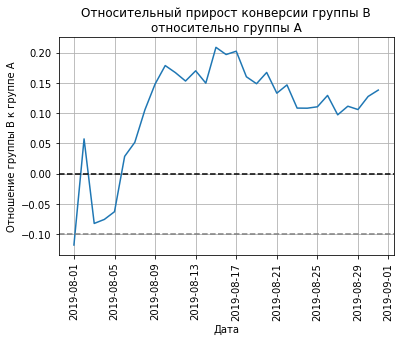

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/\
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.grid()
plt.title('Относительный прирост конверсии группы B\nотносительно группы A')
plt.xlabel("Дата")
plt.ylabel("Отношение группы В к группе А")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=90); 

*Мы видим, что в начале график сильно колеблется вокруг 0, но потом остается стабильно выше 0 без резких колебаний. Значит установилось стабильное отношение конверсии в группе В к конверсии в группе А.*

После того, как мы проанализировали как ведут себя куммулятивные конверсии и средние чеки групп В и А, нужно обратить внимание на аномальные значения - возможно они как-то повлияли на результат нашего анализа?

**Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**<a id="6"></a>

Подсчитаем количество заказов по пользователям.

In [30]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg\
({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

Построим точечную диаграмму числа заказов на одного пользователя.

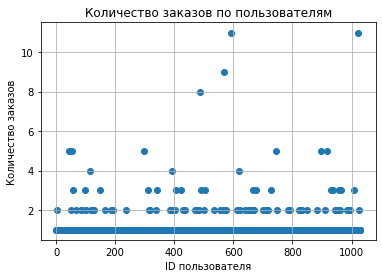

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('Количество заказов по пользователям')
plt.xlabel("ID пользователя")
plt.ylabel("Количество заказов")
plt.grid()
plt.scatter(x_values, ordersByUsers['orders']);

*Видно, что у основной части пользователей количество заказов 2 или меньше. Но из такой диаграммы все равно тяжело понять, какие значения можно считать аномальными.*

**Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**<a id="7"></a>

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [32]:
import numpy as np
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


*Возьмем в качестве границы 95 процентиль, то есть все пользователи, имеющие больше 2 заказов будут считаться аномальными.*

**Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**<a id="8"></a>

Построим точечный график стоимостей заказов.

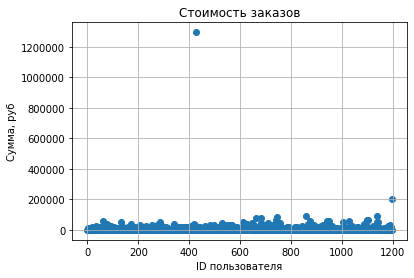

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel("ID пользователя")
plt.ylabel("Сумма, руб")
plt.grid()

*На графике довольно четко видно только два выброса, остальные же данные слились в кучу. Зададим границы значения стоимости заказов, чтобы можно было четче увидеть, как распределились суммы заказов. Возьмем в качестве ограничения 100000.*

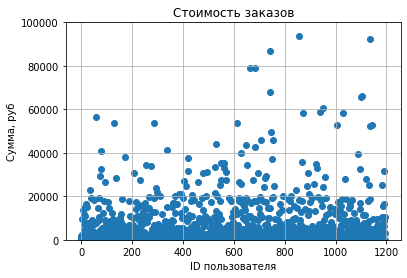

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel("ID пользователя")
plt.ylabel("Сумма, руб")
plt.ylim(0,100000)
plt.grid()

*На этом графике видно, большинство заказов расположено где-то до 30000.*

**Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**<a id="9"></a>

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [35]:
import numpy as np
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


*Опять возьмем в качестве границы 95 процентиль, то есть аномальными заказами будут те, которые стоят больше 28000.*

Итак, мы определили критерии, по которым будем считать пользователей аномальными. Теперь самое время начать проверку гипотез.

Нулевая гипотеза - конверсия в группе А и В не отличается. Альтернативная гипотеза - различия в конверсиях групп А и В присутствуют и являются статистически значимыми.

Сразу же сформулируем нулевую и альтернативную гипотезу для среднего чека, ибо они выглядят также, как и для конверсии. Нулевая - показатель среднего чека для групп А и В не отличаются значимо. Альтернативная - показатель среднего чека для групп А и В отличаются значимо.

В качестве статистического критерия выберем критерий Манна-Уитни, так как распределение данных не является нормальным и имеем 2 несвязанные группы. Уровень значимости выберем 95%.

**Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.**<a id="10"></a>

Подготовим данные к статистическому анализу.

In [36]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [37]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [38]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [39]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [40]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [41]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                        .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                                        .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [42]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B к конверсии группы A: {0:.3%}".format(sampleB.mean()/sampleA.mean()-1))

p-value = 0.008
Относительный прирост конверсии группы B к конверсии группы A: 13.808%


*Мы можем видеть, что p-value <0.05, поэтому у нас есть все основания говорить о том, что различия в конверсии двух групп являются статистически значимыми.*

**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**<a id="11"></a>

In [43]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                                    orders[orders['group']=='B']['revenue'])[1]))
print("Отличие среднего чека группы В от группы А: {0:.3%}".format(orders[orders['group']=='B']['revenue']\
                                                    .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
Отличие среднего чека группы В от группы А: 25.871%


*Мы можем видеть, что p-value >0.05, поэтому мы не можем говорить о том, что полученные различия в среденем чеке в двух группах являются статистически значимыми.*

**Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.**<a id="12"></a>

In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))
display(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

(74,)

74 пользователя являются аномальными.

In [45]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']\
        .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
        .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']\
        .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
        .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

# применим статистический критерий Манна-Уитни
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост конверсии группы B к конверсии группы A: {0:.3%}"\
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
Относительный прирост конверсии группы B к конверсии группы A: 17.270%


*Мы можем видеть, что p-value <0.05, поэтому у нас есть все основания говорить о том, что различия в конверсии двух групп являются статистически значимыми. Очищение данных от аномальных значений в целом не изменили ситуацию.*

**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**<a id="13"></a>

In [46]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Отличие среднего чека группы В от группы А: {0:.3%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.369
Отличие среднего чека группы В от группы А: -1.962%


*Мы можем видеть, что p-value >0.05, поэтому мы по-прежнему не можем говорить о том, что полученные различия в среденем чеке в двух группах являются статистически значимыми. Однако средний чек группы B стал меньше, чем группы А.*

**Примите решение по результатам теста и объясните его.**<a id="14"></a>

По результатам проведенного анализа можно констатировать тот факт, различия в конверсиях между группами являются статистически значимыми как по очищенным данным, так и без очистки. Конверсия группы В более высокая, чем в группе А. Показатели конверсии во второй половине теста остаются стабильными, поэтому у нас нет оснований быть недовольными результатами и их можно зафиксировать. Что касается среднего чека, то различия в нем не являются статистически значимыми как для очищенных, так и для неочищенных данных. Получив p-value значительно больше 0.05, мы можем смело заявить, что у нас нет никаких оснований полагать, что различия в средних чеках являются статистически значимыми. Значит, тест можно остановить, зафиксировать результаты и переходить к тестированию других гипотез.

## Выводы

В первой части работы мы приоритизировали гипотезы по 2 фрейморкам - ICE и RICE. Хоть мы и получили в целом разные результаты, но определенные общие моменты выделить можно. Первые 5 гипотез по обеои фреймворкам - одинаковые, значит, именно их надо тестировать в первую очередь. Соответственно и последние 4 тоже одинаковые, причем отстают от первых 5 они довольно прилично. Следовательно, можно сделать вывод, что тестировать их нужно в последнюю очередь.

Во второй части работы мы анализировали результаты А/В теста. Мы проанализировали, как отличаются друг от друга куммулятивные метрики конверсии и среднего чека для двух групп, выделили 'аномальных' пользователей. По графикам показалось, что результаты группы В лучше, чем у группы А. Но чтобы удостовериться в том, что эти различия статистически значимы, мы проверили гипотезы о равенстве этих метрик в двух группах для выборок с 'аномальными' пользователями и без них. В результате получилось, что 'аномальные' пользователи на результат не повлияли. В обоих случаях получилось, что гипотезу о равенстве среднего чека отклонить не получилось, а вот гипотезу о равенстве конверсий у нас были все основания отклонить - p-value получился сильно меньше заданного критического уровня в 5%.